# Praktikum 3: Softmax, Regularisierung, Momentum und Batchsize
## 4. Eigener Datensatz
Suchen Sie sich eine verfügbare PyTorch MLP-Implementierung für einen Datensatz heraus, der Sie besonders interessiert. Reproduzieren Sie die Ergebnisse lokal, auf colab oder RosettaHub. Ist die Implementierung vergleichbar mit der hier gegebenen IMDB Implementierung? Wo unterscheidet sich diese und ggf. warum? Wie verändern Sich die Ergebnisse, wenn Sie bestimmte Hyperparameter verändern?

Quelle: https://github.com/christianversloot/machine-learning-articles/blob/main/creating-a-multilayer-perceptron-with-pytorch-and-lightning.md


In [1]:
import os
import torch
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms
from matplotlib import pyplot as plt

import numpy as np

Unterschied zu IMDB Implementierung:
- hier feste Neuronenanzahl je Layer, andere werden erst bei Initialisierung festgelegt
- vorher flatten() ausgeführt, bei uns wird x_train vorher in torch umgewandelt
- ReLU statt sigmoid verwendet
- keine Aktivierungsfunktion im letzten Layer

In [13]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10),
      nn.Softmax() #selbst hinzugefügt
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

Unterschied zu IMDB Implementierung:
- Funktion zur erstellung der batches selbst definiert
- Batchsize 100 statt 10

https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

In [14]:
# Prepare CIFAR-10 dataset
dataset = CIFAR10(os.getcwd(), download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

Files already downloaded and verified


Unterschied zu IMDB Implementierung:
- Adam statt SGD optimizer
- beide verwenden CrossEnropyLoss

In [27]:
# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-2)# vorher 1e-4

Unterschied zu IMDB Implementierung:
- kaum Unterschied zur IMDB Implementierung
- Epochenanzahl festgelegt und nicht variabel

In [28]:
# loss_list = [] 
# # Run the training loop
# for epoch in range(0, 5): # 5 epochs at maximum

#     # Print epoch
#     print(f'Starting epoch {epoch+1}')

#     # Set current loss value
#     current_loss = 0.0

#     # Iterate over the DataLoader for training data
#     for i, data in enumerate(trainloader, 0):
        
#         # Get inputs
#         inputs, targets = data
        
#         # Zero the gradients
#         optimizer.zero_grad()
        
#         # Perform forward pass
#         outputs = mlp(inputs)
        
#         # Compute loss
#         loss = loss_function(outputs, targets)
        
#         # Perform backward pass
#         loss.backward()
        
#         # Perform optimization
#         optimizer.step()
        
#         loss_list.append(loss.item())

#         # Print statistics
#         current_loss += loss.item()
#         if i % 500 == 499:
#             print('Loss after mini-batch %5d: %.3f' %
#                 (i + 1, current_loss / 500))
#             current_loss = 0.0

#     # Process is complete.
# print('Training process has finished.')

In [29]:
loss_list = [] 
loss_dict = dict()
accuracy_list = []
correct = []

# Run the training loop
for epoch in range(0, 5): # 5 epochs at maximum

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
        
        # Get inputs
        inputs, targets = data
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Perform forward pass
        outputs = mlp(inputs)
        
        # Compute loss
        loss = loss_function(outputs, targets)
        
        # Perform backward pass
        loss.backward()
        
        # Perform optimization
        optimizer.step()
        
        loss_list.append(loss.item())

        # Print statistics
        current_loss += loss.item()
        if i % 500 == 499:
            print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
            if epoch == 0:
                loss_dict[i] = [current_loss/500]
            else:
                loss_dict[i].append(current_loss/500)
            current_loss = 0.0

        # Es gibt keine Testdaten
        # Anzahl korrekter Daten ermitteln
        # correct.append(outputs == targets)

    # accuracy_list[epoch] = correct.mean()
    # correct = []

    # Process is complete.
print('Training process has finished.')

Starting epoch 1


c:\Users\anika\Desktop\GINN\Praktikum\.venv\lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Loss after mini-batch   500: 2.359
Loss after mini-batch  1000: 2.362
Loss after mini-batch  1500: 2.359
Loss after mini-batch  2000: 2.362
Loss after mini-batch  2500: 2.362
Loss after mini-batch  3000: 2.356
Loss after mini-batch  3500: 2.370
Loss after mini-batch  4000: 2.362
Loss after mini-batch  4500: 2.358
Loss after mini-batch  5000: 2.362
Starting epoch 2
Loss after mini-batch   500: 2.355
Loss after mini-batch  1000: 2.361
Loss after mini-batch  1500: 2.359
Loss after mini-batch  2000: 2.357
Loss after mini-batch  2500: 2.371
Loss after mini-batch  3000: 2.362
Loss after mini-batch  3500: 2.363
Loss after mini-batch  4000: 2.358
Loss after mini-batch  4500: 2.358
Loss after mini-batch  5000: 2.369
Starting epoch 3
Loss after mini-batch   500: 2.363
Loss after mini-batch  1000: 2.356
Loss after mini-batch  1500: 2.360
Loss after mini-batch  2000: 2.363
Loss after mini-batch  2500: 2.356
Loss after mini-batch  3000: 2.361
Loss after mini-batch  3500: 2.368
Loss after mini-batch

wieso 10 statt 1 Wert wie in target?

In [39]:
data[0].shape


torch.Size([10, 3, 32, 32])

In [40]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: c:\Users\anika\Desktop\GINN\Praktikum\Praktikum3
    Split: Train
    StandardTransform
Transform: ToTensor()

In [36]:
outputs

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], grad_fn=<SoftmaxBackward0>)

In [31]:
targets

tensor([2, 7, 4, 8, 4, 0, 1, 9, 8, 5])

Text(0.5, 1.0, 'Durchschnittlicher Loss aus 500 Trainingsschritten \nje Epoche')

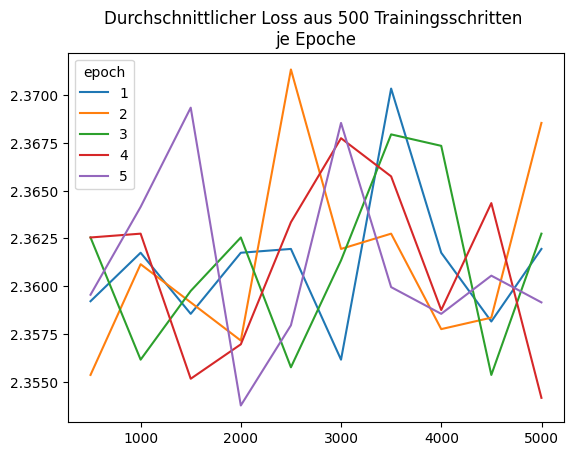

In [32]:
#plot changing loss for each epoch
labels = range(1, len(loss_dict[499])+1)
plt.plot(loss_dict.keys(), loss_dict.values(),label = labels)
plt.legend(title = 'epoch')
plt.title('Durchschnittlicher Loss aus 500 Trainingsschritten \nje Epoche')

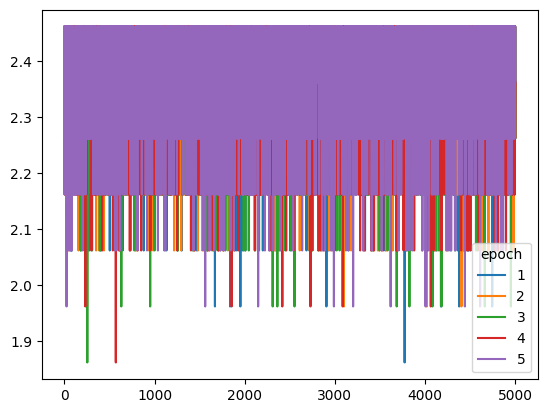

In [33]:
# Damit Grafik mit jeder Epochenanzahl funktioniert
epoch_count = len(loss_list) // 5000  # Ganzzahldivision
loss_list_chunked = np.array_split(loss_list, epoch_count)


for i in range(epoch_count):
    plt.plot(range(1,5001), loss_list_chunked[i],label = i+1)
plt.legend(title = 'epoch')


In [34]:
len(loss_list_chunked)

5